In [10]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
from matplotlib import pyplot as plt

import shap
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

### Regression


Actual vs Predicted:
        Actual  Predicted
56    0.001567   0.002044
194   0.001440   0.001912
2225  0.002216   0.002367
233   0.002248   0.002149
1902  0.001589   0.002239
...        ...        ...
2296  0.002643   0.002183
1127  0.001835   0.002120
2456  0.002528   0.002615
1915  0.002439   0.001997
841   0.002566   0.002041

[510 rows x 2 columns]
Mean Percentage Error on Test Set: 16.6253%


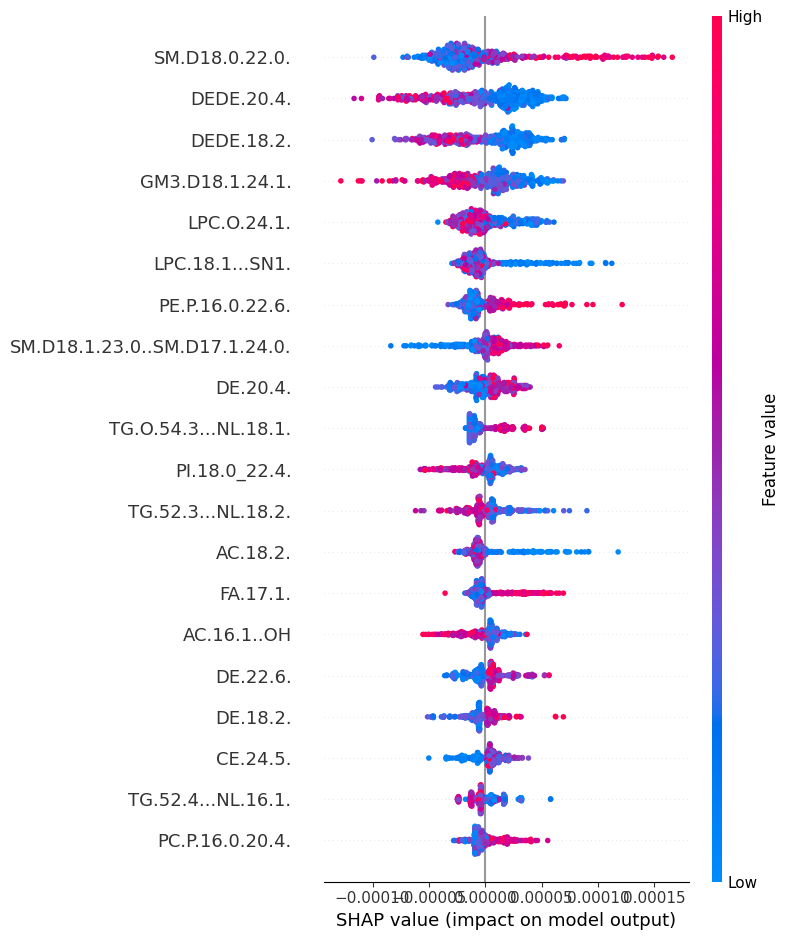

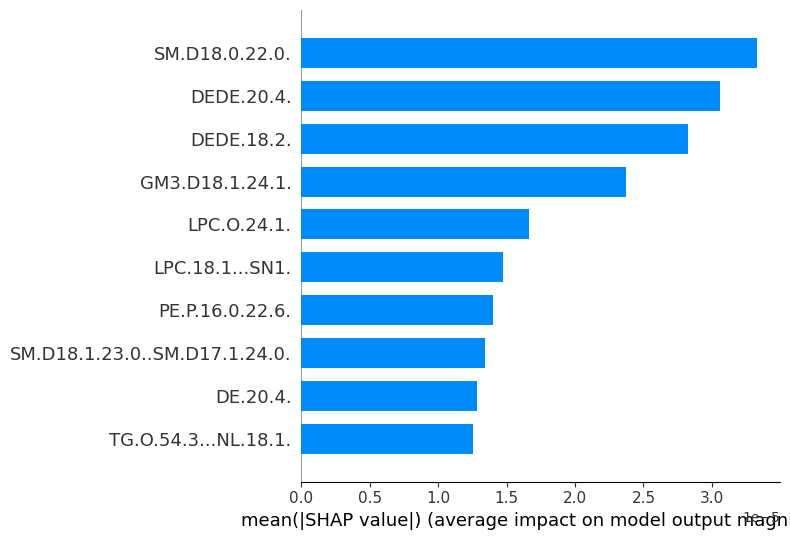

In [9]:
DATASET = 'Dataset3.0.csv'
dataset = pd.read_csv(DATASET)
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
lipids_only = dataset.iloc[:, [2,3] + list(range(54, 837))]
columns_to_drop = ['LHC_ICV', 'RHC_ICV']
X = lipids_only.drop(columns=columns_to_drop, axis=1)
y = lipids_only['LHC_ICV']

# Assuming 'X' and 'y' are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

mape = MAPE(y_test, y_pred)
print(f"Mean Percentage Error on Test Set: {mape:.4f}%")

# Create a SHAP explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Plot the top 5 features based on mean absolute SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar", max_display=10)

### Classification

In [11]:
DATASET = 'Dataset_Ciaran_McEvoy.csv'
dataset = pd.read_csv(DATASET)

dataset.replace('M', 1, inplace=True)
dataset.replace('F', 0, inplace=True)
dataset.replace('AD', 0, inplace=True)
dataset.replace('CN', 1, inplace=True)
dataset.replace('MCI', 2, inplace=True)
dataset.replace('EMCI', 3, inplace=True)
dataset.replace('LMCI', 4, inplace=True)
dataset.replace('SMC', 5, inplace=True)
X = dataset.drop(columns=['VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
y = dataset['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1,
                                   max_depth=5, alpha=10, n_estimators=100, random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

/opt/conda/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/li

Accuracy: 0.7137254901960784

Actual vs Predicted:
      Actual  Predicted
56         2          2
194        0          0
2225       1          1
233        2          2
1902       0          2
...      ...        ...
2296       1          1
1127       0          2
2456       4          4
1915       1          1
841        1          1

[510 rows x 2 columns]


/opt/conda/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
